# Point Cloud Visualization

In [1]:
from platform import python_version
print(python_version())

3.10.0


In [2]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Format: pcd | Package: Open3D

In [3]:
cloud = o3d.io.read_point_cloud("D:/university/6semestr/AI-diploma-niias/stasik/src/cloud_2_0100.pcd")

print(np.asarray(cloud.points))
print(np.asarray(cloud.colors))
print(np.asarray(cloud.normals))
print(cloud)
print('Shape of points', np.asarray(cloud.points).shape)
print('Shape of colors', np.asarray(cloud.colors).shape) # no color data

[[-1.725     -1.08       1.1950001]
 [-1.722     -1.08       1.1930001]
 [-1.719     -1.08       1.1930001]
 ...
 [ 1.899      1.077      3.1790001]
 [ 1.9020001  1.077      3.1790001]
 [ 1.905      1.077      3.1890001]]
[[0.70588235 1.         0.        ]
 [0.70588235 1.         0.        ]
 [0.70588235 1.         0.        ]
 ...
 [0.24705882 0.         1.        ]
 [0.24705882 0.         1.        ]
 [0.24705882 0.         1.        ]]
[]
PointCloud with 741067 points.
Shape of points (741067, 3)
Shape of colors (741067, 3)


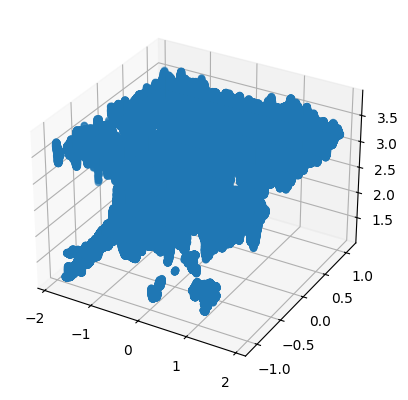

In [4]:
points = np.asarray(cloud.points)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])
plt.show()

In [4]:
downpcd = cloud.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([cloud])